In [7]:
from langchain_groq import ChatGroq
llm=ChatGroq(model_name="Gemma2-9b-It")

In [8]:
llm.invoke("hi").content

'Hello! 👋\n\nWhat can I do for you today? 😊\n'

In [10]:
pip install langgraph  


  Using cached langgraph-0.3.21-py3-none-any.whl.metadata (7.7 kB)
  Using cached langgraph_checkpoint-2.0.23-py3-none-any.whl.metadata (4.6 kB)
  Using cached langgraph_prebuilt-0.1.7-py3-none-any.whl.metadata (5.0 kB)
  Using cached langgraph_sdk-0.1.60-py3-none-any.whl.metadata (1.8 kB)
  Using cached xxhash-3.5.0-cp311-cp311-win_amd64.whl.metadata (13 kB)
  Using cached ormsgpack-1.9.1-cp311-cp311-win_amd64.whl.metadata (44 kB)
Using cached langgraph-0.3.21-py3-none-any.whl (138 kB)
Using cached langgraph_checkpoint-2.0.23-py3-none-any.whl (41 kB)
Using cached langgraph_prebuilt-0.1.7-py3-none-any.whl (25 kB)
Using cached langgraph_sdk-0.1.60-py3-none-any.whl (47 kB)
Using cached xxhash-3.5.0-cp311-cp311-win_amd64.whl (30 kB)
Using cached ormsgpack-1.9.1-cp311-cp311-win_amd64.whl (125 kB)



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
from langgraph.graph import StateGraph,MessagesState, START, END
from langgraph.graph.message import add_messages
from typing import Annotated, Literal, TypedDict
from langchain_core.tools import tool
from langchain_core.messages import HumanMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.prebuilt import ToolNode

In [13]:
def call_model(state: MessagesState):
    messages = state['messages']
    response = llm.invoke(messages)
    return {"messages": [response]}

In [14]:
workflow=StateGraph(MessagesState)
workflow.add_node("chatbot",call_model)
workflow.add_edge(START, "chatbot")
workflow.add_edge("chatbot",END)
app=workflow.compile()

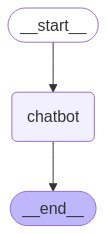

In [15]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [22]:
pip install typing

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26325 sha256=4aa186f04ecd99ea67d8c38a09a0ece00081714d357f7e81a43c181b64b49e16
  Stored in directory: c:\users\shree\appdata\local\pip\cache\wheels\9d\67\2f\53e3ef32ec48d11d7d60245255e2d71e908201d20c880c08ee
Successfully built typing
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
from typing import TypedDict, Annotated, Any

class AnyMessage:
    # Define the structure or behavior of AnyMessage here
    pass

class MessagesState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

In [35]:
input={"messages":["hi, my name is mohini"]}

In [36]:
app.invoke(input)

{'messages': [HumanMessage(content='hi, my name is mohini', additional_kwargs={}, response_metadata={}, id='a0105f3c-ea95-4f01-9a9c-f29405971ad3'),
  AIMessage(content="Hello Mohini, it's nice to meet you! 👋\n\nWhat can I do for you today? 😊  \n\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 28, 'prompt_tokens': 16, 'total_tokens': 44, 'completion_time': 0.050909091, 'prompt_time': 0.001910589, 'queue_time': 0.23516736600000002, 'total_time': 0.05281968}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-e4912909-0c94-4396-ab71-9cbc78a0b024-0', usage_metadata={'input_tokens': 16, 'output_tokens': 28, 'total_tokens': 44})]}

In [37]:
for output in app.stream(input):
    for key,value in output.items():
        print(f"Output from {key} Node")
        print("_______")
        print(value)
        print("\n")

Output from chatbot Node
_______
{'messages': [AIMessage(content="Hi Mohini, it's nice to meet you! 😊\n\nIs there anything I can help you with today?  \n\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 29, 'prompt_tokens': 16, 'total_tokens': 45, 'completion_time': 0.052727273, 'prompt_time': 0.001894898, 'queue_time': 0.236841571, 'total_time': 0.054622171}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-5fec4bb4-c902-46d3-b412-d904ca98362c-0', usage_metadata={'input_tokens': 16, 'output_tokens': 29, 'total_tokens': 45})]}




In [42]:
@tool
def search(query: str):
    """this is my custom tool."""
    if "sf" in query.lower() or "san francisco" in query.lower():
        return "It's 60 degrees and foggy."
    return "It's 90 degrees and mohini."

In [43]:
search.invoke("what is a temprature in sf?")

"It's 60 degrees and foggy."

In [44]:
search.invoke("what is a weather in india?")

"It's 90 degrees and mohini."

In [45]:
search

StructuredTool(name='search', description='this is my custom tool.', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x0000016B4378C9A0>)

In [46]:
tools=[search]

In [47]:
tool_node=ToolNode(tools)

In [48]:
llm_with_tool=llm.bind_tools(tools)

In [49]:
def call_model(state: MessagesState):
    messages = state['messages']
    response = llm_with_tool.invoke(messages)
    return {"messages": [response]}

In [51]:
response=call_model({"messages": ["hi how are you?"]})

In [52]:
response

{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_ye8w', 'function': {'arguments': '{"query":"hi how are you"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 83, 'prompt_tokens': 941, 'total_tokens': 1024, 'completion_time': 0.150909091, 'prompt_time': 0.041003159, 'queue_time': 0.238734819, 'total_time': 0.19191225}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-48fcda50-157b-4b14-939c-4b49e794230a-0', tool_calls=[{'name': 'search', 'args': {'query': 'hi how are you'}, 'id': 'call_ye8w', 'type': 'tool_call'}], usage_metadata={'input_tokens': 941, 'output_tokens': 83, 'total_tokens': 1024})]}

[AIMessage(content='I am doing well, thank you. How are you?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 941, 'total_tokens': 955, 'completion_time': 0.025454545, 'prompt_time': 0.030139486, 'queue_time': 0.0028640919999999986, 'total_time': 0.055594031}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-7176e5d9-307e-4644-93e2-99d358198179-0', usage_metadata={'input_tokens': 941, 'output_tokens': 14, 'total_tokens': 955})]

In [53]:
messages = response['messages']

In [54]:
last_message=messages[-1]

In [55]:
last_message.tool_calls

[{'name': 'search',
  'args': {'query': 'hi how are you'},
  'id': 'call_ye8w',
  'type': 'tool_call'}]

In [56]:
response=call_model({"messages": ["what is a weather in India?"]})

In [57]:
response

{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_wmzd', 'function': {'arguments': '{"query":"weather in India"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 80, 'prompt_tokens': 943, 'total_tokens': 1023, 'completion_time': 0.145454545, 'prompt_time': 0.04884465, 'queue_time': 0.235093648, 'total_time': 0.194299195}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-f883e812-3e23-45e1-9969-482b172d2fbd-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in India'}, 'id': 'call_wmzd', 'type': 'tool_call'}], usage_metadata={'input_tokens': 943, 'output_tokens': 80, 'total_tokens': 1023})]}

[AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_5q56', 'function': {'arguments': '{"query":"weather in India"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 82, 'prompt_tokens': 943, 'total_tokens': 1025, 'completion_time': 0.149090909, 'prompt_time': 0.031104902, 'queue_time': 0.003129146000000003, 'total_time': 0.180195811}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-35d08bfe-0844-4902-8d36-71630335dd9e-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in India'}, 'id': 'call_5q56', 'type': 'tool_call'}], usage_metadata={'input_tokens': 943, 'output_tokens': 82, 'total_tokens': 1025})]

In [58]:
messages = response['messages']

In [59]:
last_message=messages[-1]

In [61]:
last_message.tool_calls

[{'name': 'search',
  'args': {'query': 'weather in India'},
  'id': 'call_wmzd',
  'type': 'tool_call'}]

In [63]:
def router_function(state: MessagesState) -> Literal["tools", END]:
    #print(f"here is a state from should continue {state}")
    messages = state['messages']
    last_message = messages[-1]
    #print(f"here is a last message from should continue {last_message}")
    if last_message.tool_calls:
        return "tools"
    return END

In [64]:
# Define a new graph
workflow = StateGraph(MessagesState)

workflow.add_node("agent", call_model)
workflow.add_node("tools", tool_node)

workflow.add_edge(START, "agent")

workflow.add_conditional_edges("agent",router_function,{"tools": "tools", END: END})

app = workflow.compile()

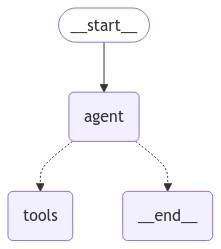

In [84]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [65]:
app.invoke({"messages": ["hi how are you?"]})

{'messages': [HumanMessage(content='hi how are you?', additional_kwargs={}, response_metadata={}, id='1951d5f1-03b2-4a2a-8eec-fa761d81b2b1'),
  AIMessage(content="<tool-use></tool-use>I am an AI assistant, so I don't have feelings. How can I help you?\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 32, 'prompt_tokens': 941, 'total_tokens': 973, 'completion_time': 0.058181818, 'prompt_time': 0.041003696, 'queue_time': 0.238723718, 'total_time': 0.099185514}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-472322ba-3bb8-4726-b3b6-628536a16b18-0', usage_metadata={'input_tokens': 941, 'output_tokens': 32, 'total_tokens': 973})]}

In [66]:
app.invoke({"messages": ["what is the weather in sf"]})

{'messages': [HumanMessage(content='what is the weather in sf', additional_kwargs={}, response_metadata={}, id='da091fe5-4f2d-4cc6-bf67-23736243d9a3'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_a09t', 'function': {'arguments': '{"query":"weather in sf"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 82, 'prompt_tokens': 942, 'total_tokens': 1024, 'completion_time': 0.149090909, 'prompt_time': 0.033049164, 'queue_time': 0.23365626800000003, 'total_time': 0.182140073}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-9555980a-4feb-49c5-b134-ad12d59dc95e-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in sf'}, 'id': 'call_a09t', 'type': 'tool_call'}], usage_metadata={'input_tokens': 942, 'output_tokens': 82, 'total_tokens': 1024}),
  ToolMessage(content="It's 60 degrees and foggy.", name='search', id='3009588a-0808-47

In [67]:
workflow.add_edge("tools", 'agent')

Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.


In [68]:
app = workflow.compile()

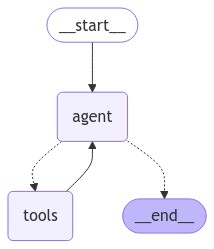

In [89]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [69]:
for output in app.stream({"messages": ["what is the weather in sf"]}):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from agent
_______
{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_zne9', 'function': {'arguments': '{"query":"weather in sf"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 82, 'prompt_tokens': 942, 'total_tokens': 1024, 'completion_time': 0.149090909, 'prompt_time': 0.160216264, 'queue_time': 0.280386514, 'total_time': 0.309307173}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-3fc3d60d-3f98-4811-85ee-abf64afa36db-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in sf'}, 'id': 'call_zne9', 'type': 'tool_call'}], usage_metadata={'input_tokens': 942, 'output_tokens': 82, 'total_tokens': 1024})]}


here is output from tools
_______
{'messages': [ToolMessage(content="It's 60 degrees and foggy.", name='search', id='d82478c3-dab0-4d15-bda2-c578956c109f', tool_call_id='call_zne9')]}


here is outp

In [70]:
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()

In [71]:
# Define a new graph
workflow3 = StateGraph(MessagesState)

workflow3.add_node("agent", call_model)
workflow3.add_node("tools", tool_node)

workflow3.add_edge(START, "agent")

workflow3.add_conditional_edges("agent",router_function,{"tools": "tools", END: END})

workflow3.add_edge("tools", 'agent')

In [72]:
app3 = workflow3.compile(checkpointer = memory)

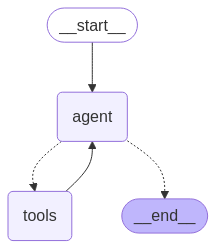

In [73]:
from IPython.display import Image, display

try:
    display(Image(app3.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [74]:
config = {"configurable": {"thread_id": "1"}}

In [75]:
events = app3.stream(
    {"messages": ["Hi there! My name is Sunny."]}, config, stream_mode="values"
)

In [76]:
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Hi there! My name is Sunny.
================================== Ai Message ==================================
Tool Calls:
  search (call_fvjz)
 Call ID: call_fvjz
  Args:
    query: hi there
================================= Tool Message =================================
Name: search

It's 90 degrees and mohini.
================================== Ai Message ==================================
Tool Calls:
  search (call_m8sg)
 Call ID: call_m8sg
  Args:
    query: what is the weather like
================================= Tool Message =================================
Name: search

It's 90 degrees and mohini.
================================== Ai Message ==================================

It's 90 degrees and mohini.


In [77]:
events = app3.stream(
    {"messages": ["can you tell me what was my name?"]}, config, stream_mode="values"
)

In [78]:
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

can you tell me what was my name?
================================== Ai Message ==================================

Sunny


In [80]:
memory.get(config)

{'v': 2,
 'ts': '2025-03-30T16:56:09.395747+00:00',
 'id': '1f00d87e-0ee7-6d66-8008-1de2ae22692c',
 'channel_versions': {'__start__': '00000000000000000000000000000009.0.15174962525918068',
  'messages': '00000000000000000000000000000010.0.2626037055441701',
  'start:agent': '00000000000000000000000000000010.0.14035107406901492',
  'agent': '00000000000000000000000000000010.0.9184546146423499',
  'branch:to:tools': '00000000000000000000000000000006.0.6387063813952989',
  'tools': '00000000000000000000000000000007.0.6709777222125861'},
 'versions_seen': {'__input__': {},
  '__start__': {'__start__': '00000000000000000000000000000008.0.8014298037898226'},
  'agent': {'start:agent': '00000000000000000000000000000009.0.6935052407997518',
   'tools': '00000000000000000000000000000007.0.6709777222125861'},
  'tools': {'branch:to:tools': '00000000000000000000000000000005.0.5642722027253284'}},
 'channel_values': {'messages': [HumanMessage(content='Hi there! My name is Sunny.', additional_kwar